<a href="https://colab.research.google.com/github/wanningcassie/Data_Visualization/blob/main/M1_Titanic_PMLv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**M1 Titanic**
This dataset comes from the most famous shipwreck of all time. The data is available from multiple locations on the web, e.g., Kaggle: https://www.kaggle.com/c/titanic/data



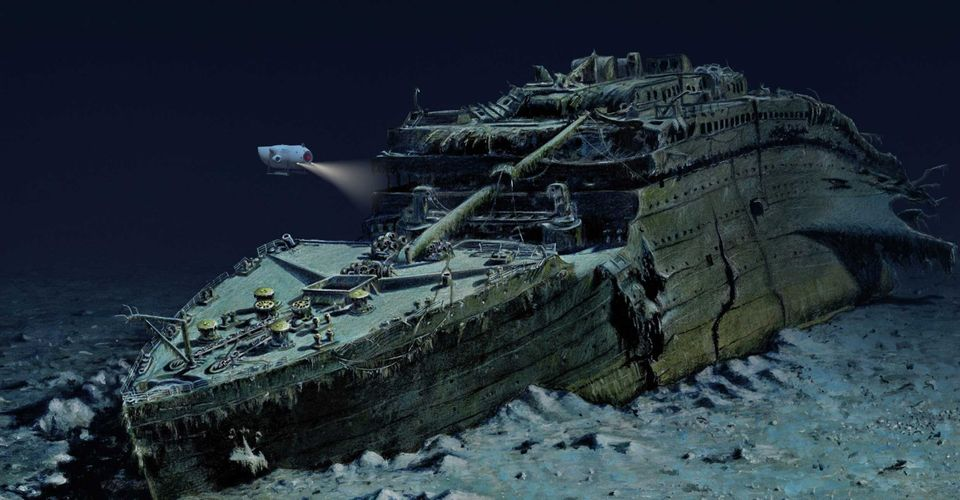

Source: https://mollybrown.org/dust-to-dust-the-titanic-today-and-in-the-future/
Fair use claimed.

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Engineering
* Classifiers
  * Decision Tree
  * Logistic Regression
  * PyTorch Model (neural network)
  * PyCaret Model (low-code model)
* Conclusion

#**Business Problem**
We want to develop a classifier that can classify the survival target variable.

#**BLUF (Bottom Line Up Front)**

Four classifier models (a decision tree, logistic regression, PyTorch, and PyCaret models) are built and compared using the accuracy metric, confusion matrices, and the time needed to execute the code.

Overall, the PyCaret and PyTorch Lightning models seem best. But the compute for those models is much higher and the logistic regression model may deliver the best bang for your buck.


#**Libraries**

In [ ]:
# Install PyTorch Lightning
!pip install pytorch-lightning

In [ ]:
# Install PyCaret
!pip install pycaret

In [ ]:
import time

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pytorch_lightning import LightningModule

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import scipy.stats as ss

In [ ]:
# PyTorch Lightning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from torch import nn
from torch.nn import functional as F



In [ ]:
# Scikit learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Imblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

#**Data**

**Data dictionary:**

The dataset contains 1310 instances and 14 features. The features are as follows:

* pclass: class of ticket (class 1,2,3).
* survived: 0 = victim, 1 = survivor (this is the target variable)
* name: name of passenger
* sex: gender of passenger
* age: age (in years) of passenger
* sibsp: number of siblings and spouses accompanying passenger (i.e., same generation as passenger)
* parch: number of parents and children accompanying passenger (i.e., other generations than passenger)
* ticket: ticket number
* fare: fare paid by passenger
* cabin: cabin number of passenger
* embarked: port of embarkation of passenger (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat: lifeboat number (if passenger survived)
* body: body number (if passenger did not survive and the body was recovered)
* home.dest: home city/destination city

In [ ]:
import pandas as pd

# URL to the CSV file
url = 'https://drive.google.com/uc?export=download&id=1pSAWy86-a_wQXbx0E-7m-zYOGYfY2Hd7'

try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(url)

    # Display the first few rows of the DataFrame
    print("Successfully loaded CSV file:")
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded CSV file:
   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.de

#**Engineering**

In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head())
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)



HEAD of df
    pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0            

##**Missing Values**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


Missing Values
 pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1

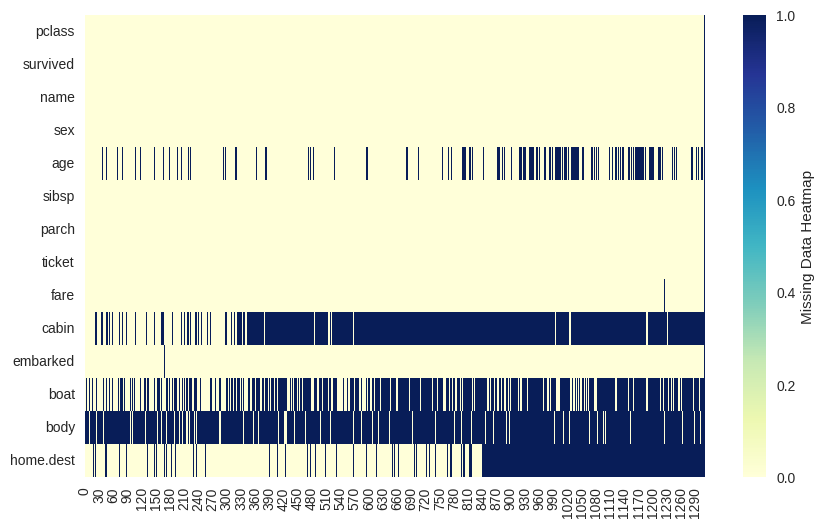

In [ ]:
# Checks
# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

In [ ]:
# Vectorized imputation using mode
cols = ['embarked', 'age', 'fare', 'pclass', 'sex', 'sibsp']
modes = df[cols].mode().iloc[0]  # Compute mode for each column (first mode if ties)
df[cols] = df[cols].fillna(modes)

In [ ]:
# delete row with missing value for survived
df = df.dropna(subset=['survived'])

In [ ]:
# delete ['home_dest','body','name'] columns
df = df.drop(columns=['home.dest','boat','body','name'])

In [ ]:
# replace missing values in columns 'cabin' with 0
df[['cabin']] = df[['cabin']].fillna(0)

In [ ]:
# Check number of missing values
df.isnull().sum()

,0
pclass,0
survived,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0
embarked,0


##**Unique Values**

In [ ]:
# Calculate number of unique valus for each column in df
unique_values = df.nunique()
print(unique_values)


pclass        3
survived      2
sex           2
age          98
sibsp         7
parch         8
ticket      929
fare        281
cabin       187
embarked      3
dtype: int64


##**Dummies or Labels?**

In [ ]:
# Dummy Encoding
df=pd.get_dummies(data=df,columns=['sex','embarked','pclass'],drop_first=True)

In [ ]:
# Label encode cabin, ticket and boat columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cabin'] = df['cabin'].astype(str)
df['cabin'] = le.fit_transform(df['cabin'])
df['ticket'] = df['ticket'].astype(str)
df['ticket'] = le.fit_transform(df['ticket'])

In [ ]:
df

,survived,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S,pclass_2.0,pclass_3.0
0,1.0,29.0000,0.0,0.0,187,211.3375,44,False,False,True,False,False
1,1.0,0.9167,1.0,2.0,49,151.5500,80,True,False,True,False,False
2,0.0,2.0000,1.0,2.0,49,151.5500,80,False,False,True,False,False
3,0.0,30.0000,1.0,2.0,49,151.5500,80,True,False,True,False,False
4,0.0,25.0000,1.0,2.0,49,151.5500,80,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,14.5000,1.0,0.0,259,14.4542,0,False,False,False,False,True
1305,0.0,24.0000,1.0,0.0,259,14.4542,0,False,False,False,False,True
1306,0.0,26.5000,0.0,0.0,250,7.2250,0,True,False,False,False,True
1307,0.0,27.0000,0.0,0.0,264,7.2250,0,True,False,False,False,True


##**Check Balance**

In [ ]:
# count target to check dataset balance
df['survived'].value_counts()

,count
survived,
0.0,809
1.0,500


##**Check Skewness**

In [ ]:
# Check skewness
df.skew()

,0
survived,0.486404
age,0.687521
sibsp,3.844220
parch,3.669078
ticket,-0.008800
fare,4.369214
cabin,2.108461
sex_male,-0.602189
embarked_Q,2.786355
embarked_S,-0.872682


##**Check and Resolve Dups**

In [ ]:
# Check for duplicates, finally
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 25


In [ ]:
# Choosing to NOT remove duplicates since each row was a passenger on the Titanic. Dups may be family members.

##**Descriptive Statistics**
Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
              count unique    top  freq        mean        std     min     25%  \
survived    1309.0    NaN    NaN   NaN    0.381971   0.486055     0.0     0.0   
age         1309.0    NaN    NaN   NaN   28.699516  13.097103  0.1667    22.0   
sibsp       1309.0    NaN    NaN   NaN    0.498854   1.041658     0.0     0.0   
parch       1309.0    NaN    NaN   NaN    0.385027    0.86556     0.0     0.0   
ticket      1309.0    NaN    NaN   NaN  463.625668  278.06949     0.0   212.0   
fare        1309.0    NaN    NaN   NaN   33.276193  51.743584     0.0  7.8958   
cabin       1309.0    NaN    NaN   NaN   22.040489  47.821397     0.0     0.0   
sex_male      1309      2   True   843         NaN        NaN     NaN     NaN   
embarked_Q    1309      2  False  1186         NaN        NaN     NaN     NaN   
embarked_S    1309      2   True   916         NaN        NaN     NaN     NaN   
pclass_2.0    1309      2  False  1032         NaN        NaN     N

CORRELATION MATRIX
             survived       age     sibsp     parch    ticket      fare  \
survived    1.000000 -0.029985 -0.027825  0.082660 -0.125869  0.244479   
age        -0.029985  1.000000 -0.186248 -0.113955 -0.092268  0.191306   
sibsp      -0.027825 -0.186248  1.000000  0.373587  0.063921  0.160388   
parch       0.082660 -0.113955  0.373587  1.000000  0.053389  0.221668   
ticket     -0.125869 -0.092268  0.063921  0.053389  1.000000 -0.014959   
fare        0.244479  0.191306  0.160388  0.221668 -0.014959  1.000000   
cabin       0.263782  0.201867 -0.005685  0.029582 -0.184385  0.340331   
sex_male   -0.528693  0.045260 -0.109609 -0.213125  0.024725 -0.185744   
embarked_Q -0.016071 -0.069303 -0.048678 -0.100943  0.060143 -0.129922   
embarked_S -0.150542 -0.019224  0.073709  0.071881  0.008784 -0.170123   
pclass_2.0  0.050790  0.019355 -0.052419 -0.010057 -0.087610 -0.121168   
pclass_3.0 -0.283428 -0.342306  0.072610  0.019521  0.296188 -0.419921   

               ca

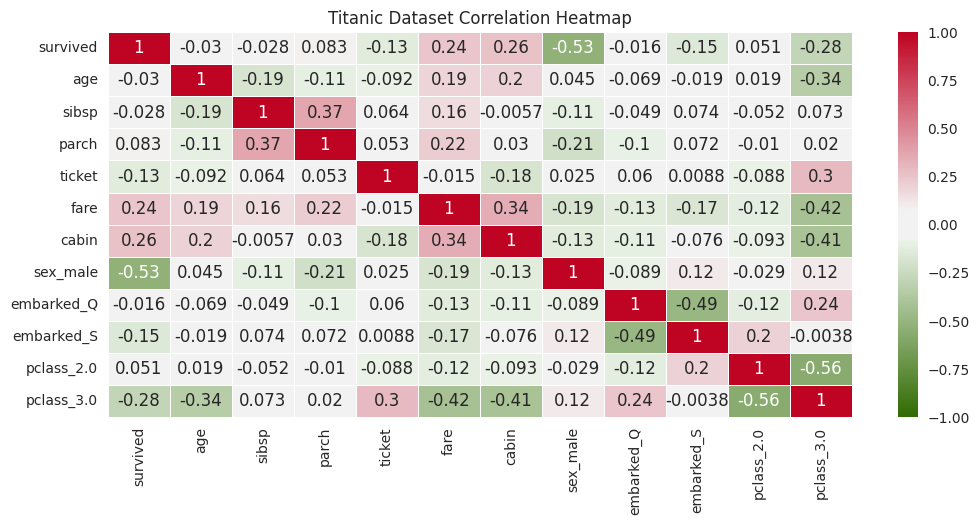

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Titanic Dataset Correlation Heatmap")
plt.show()


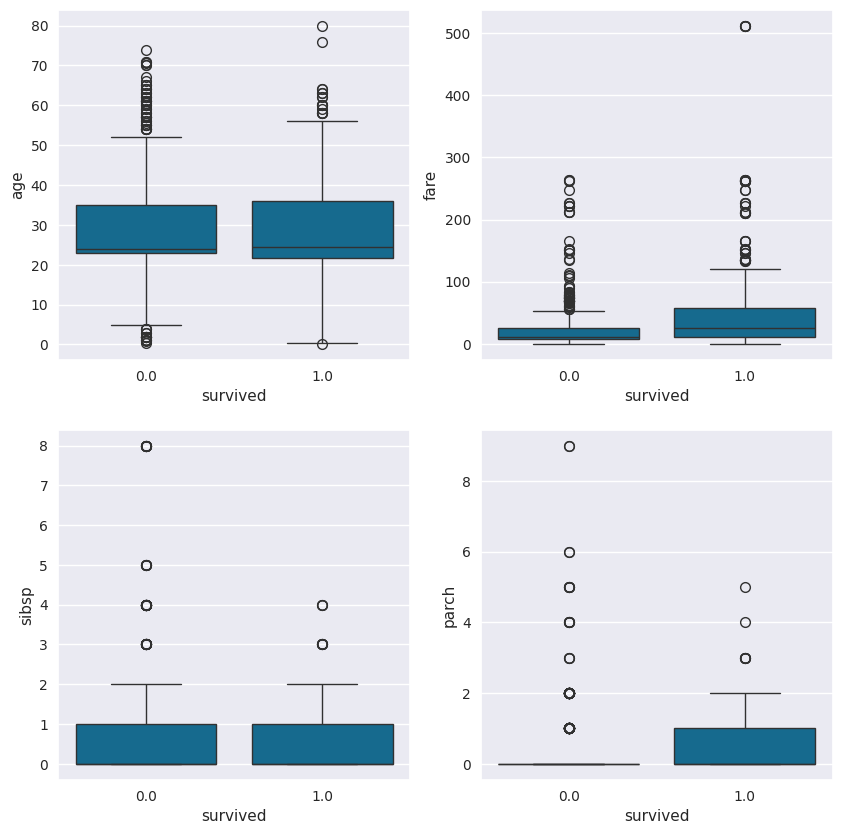

In [ ]:
# Bivariate Graphical Descriptive Statistics
# Side-by-side Boxplots

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(  y="age", x= "survived", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="fare", x= "survived", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sibsp", x= "survived", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="parch", x= "survived", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

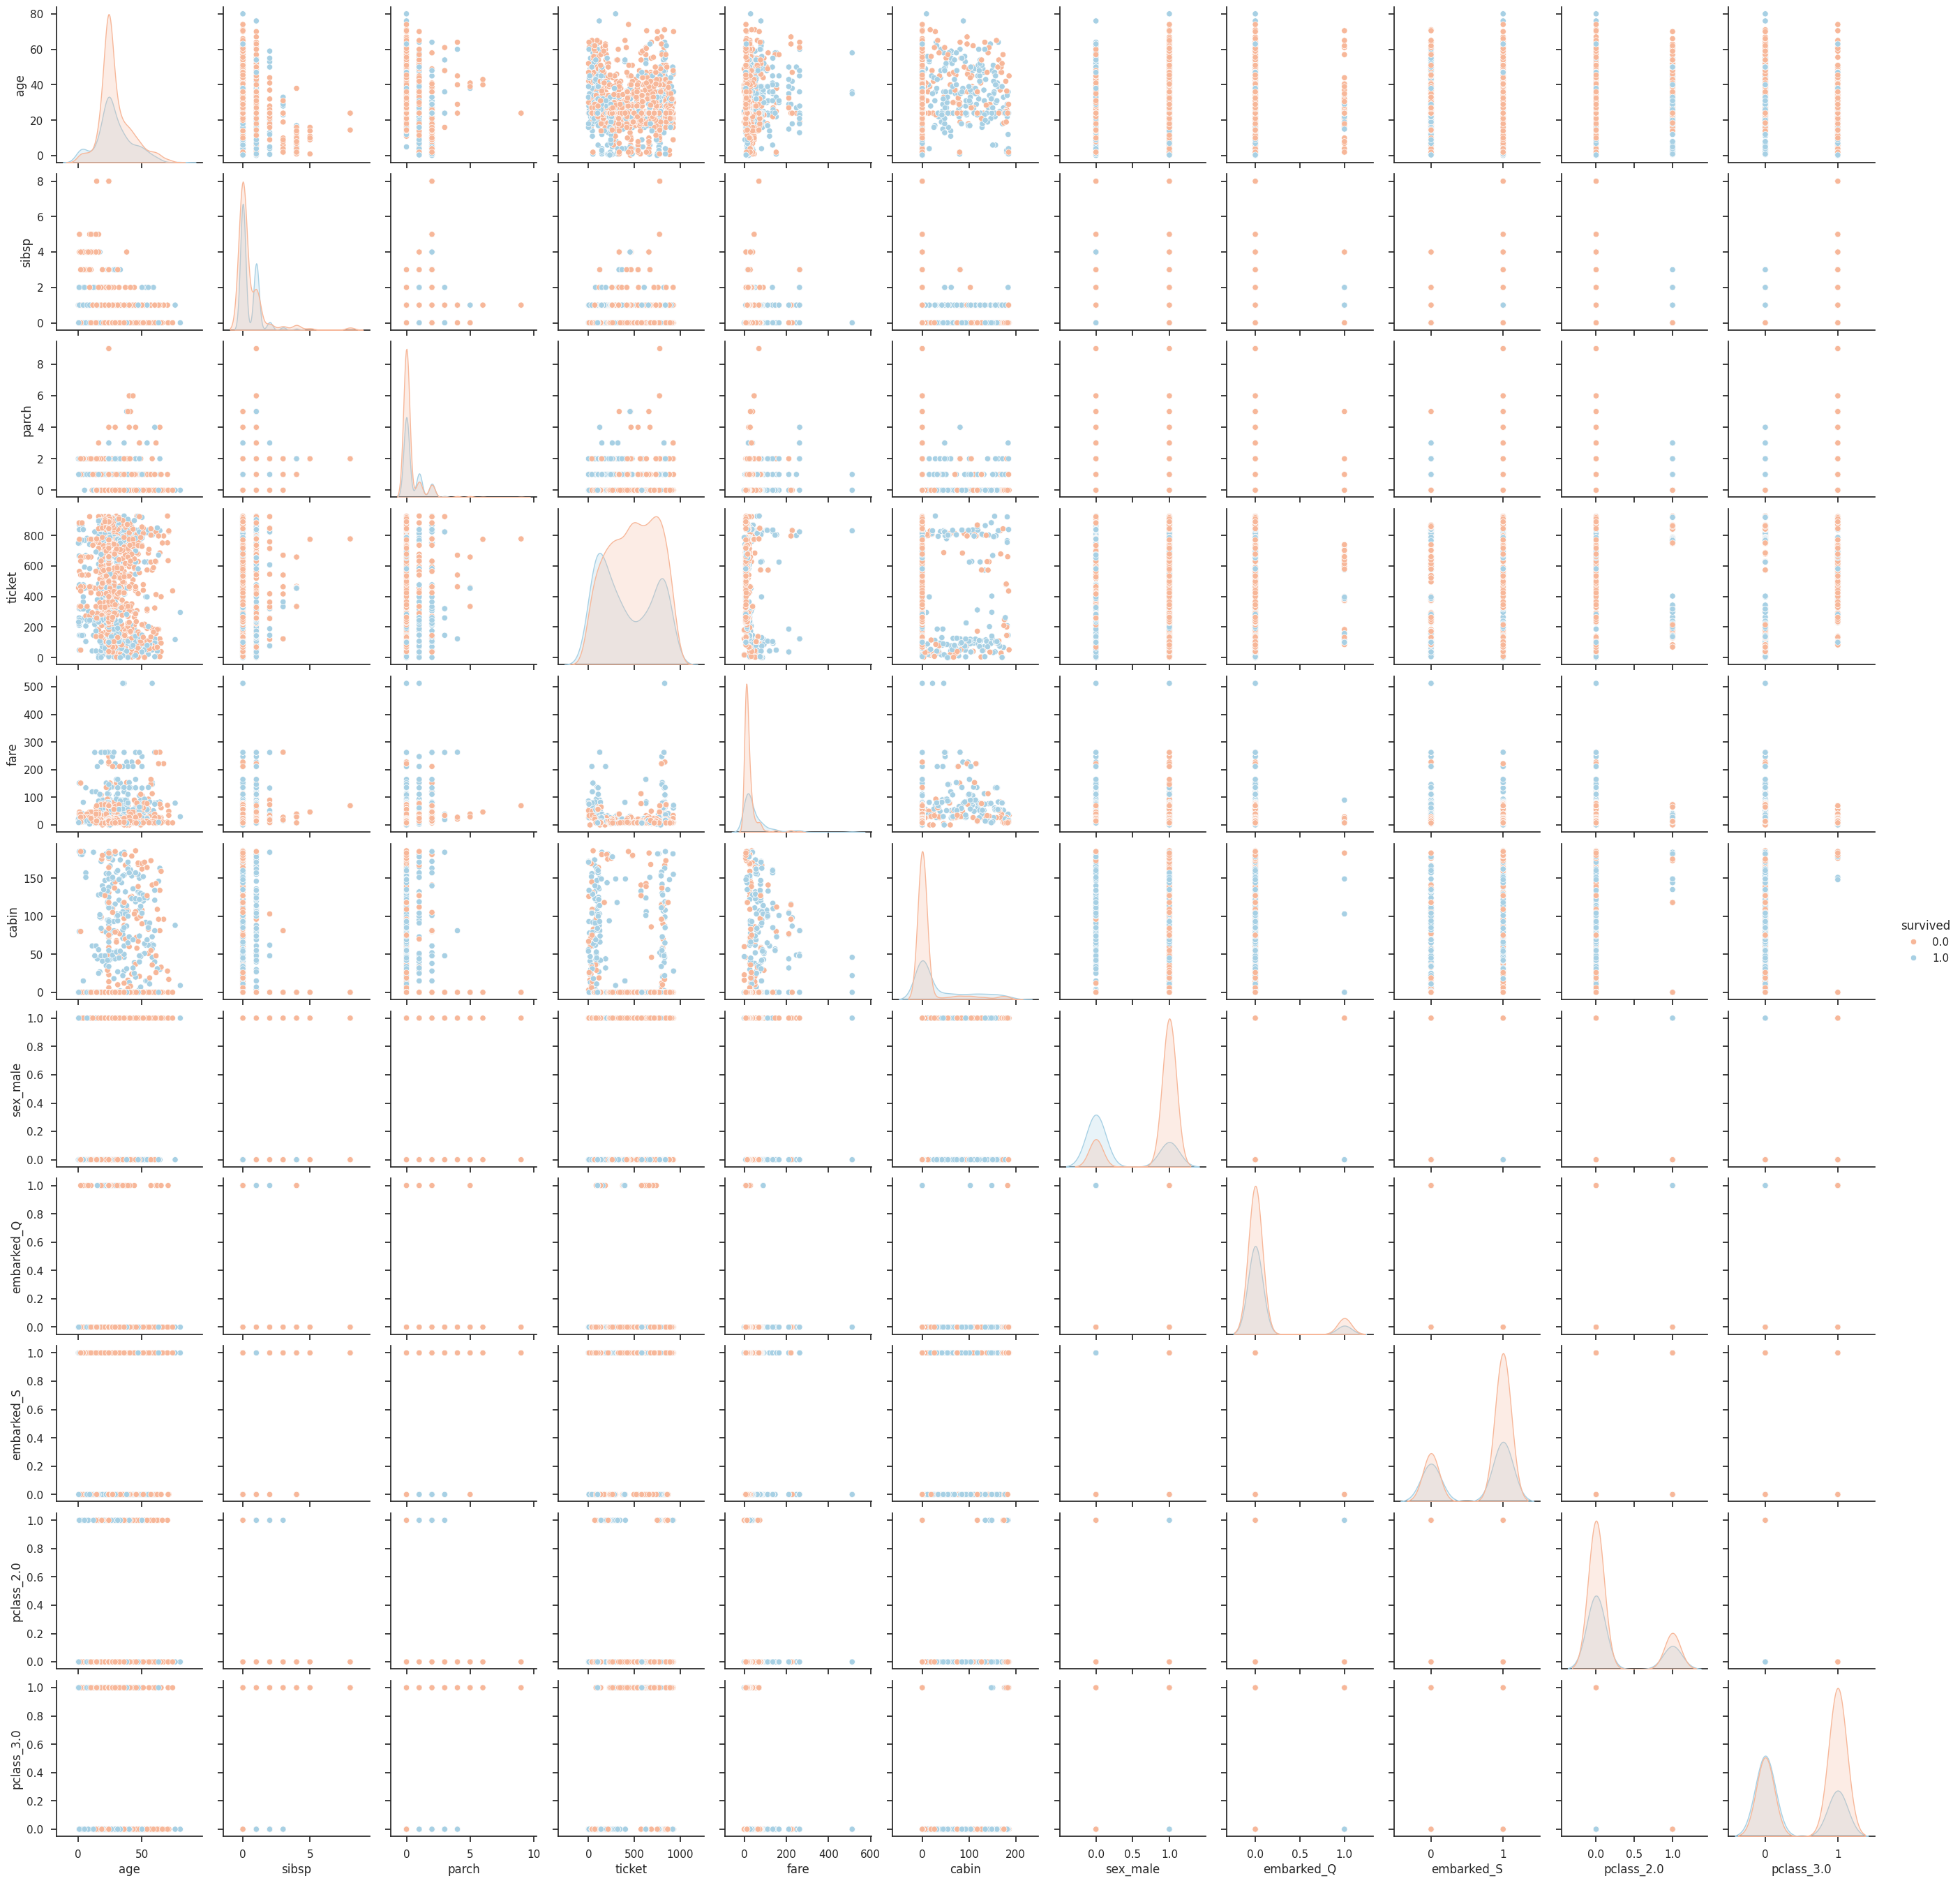

In [ ]:
# Scatterplot matrix (aka pairplot) - these can take some time to generate if the number of features is large
# Red: died, blue: survived.

sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df, hue="survived",palette="RdBu")

#**Classifiers**

##**Setting Up**

In [ ]:
# Set up predictors (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']
feature_names = X.columns

##**Decision Tree Classifier**

Selected Features based on Importance:
6       sex_male
3         ticket
4           fare
0            age
10    pclass_3.0
5          cabin
1          sibsp
2          parch
8     embarked_S
9     pclass_2.0
7     embarked_Q
Name: Feature, dtype: object


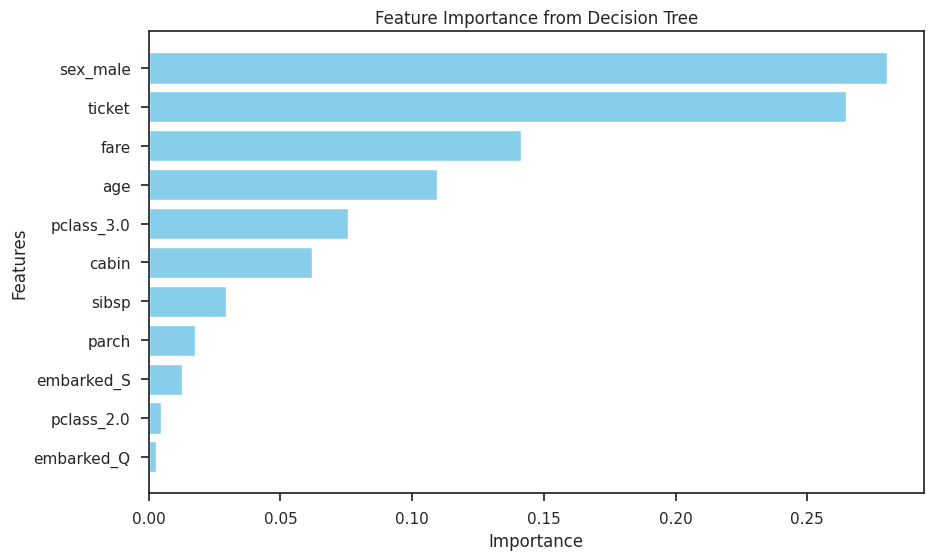

In [ ]:
# Feature Importance Using a Decision Tree Classifier

# Assuming X is your feature set and y is your target variable
# Fit a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Extract feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Select the most important features
selected_features = importance_df[importance_df['Importance'] > 0]['Feature']

# Print the selected features
print("Selected Features based on Importance:")
print(selected_features)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Elapsed time: 0.36 seconds
Average Accuracy: 0.7510
Average Confusion Matrix:
[[63.6 17.3]
 [15.3 34.7]]


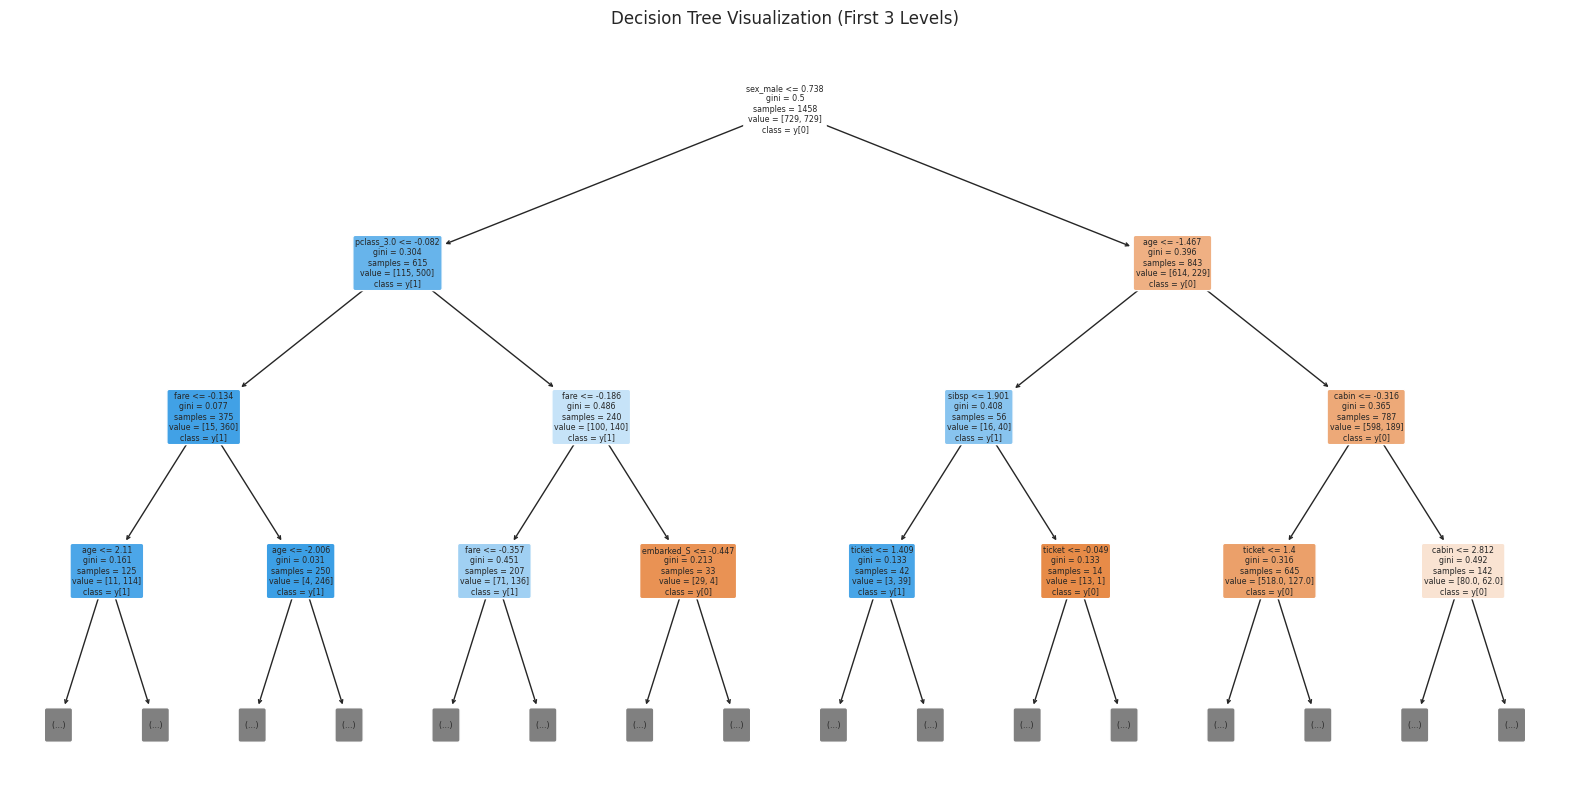


Decision Tree Rules (First 3 Levels):

|--- sex_male <= 0.74
|   |--- pclass_3.0 <= -0.08
|   |   |--- fare <= -0.13
|   |   |   |--- age <= 2.11
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- age >  2.11
|   |   |   |   |--- class: 0.0
|   |   |--- fare >  -0.13
|   |   |   |--- age <= -2.01
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- age >  -2.01
|   |   |   |   |--- truncated branch of depth 5
|   |--- pclass_3.0 >  -0.08
|   |   |--- fare <= -0.19
|   |   |   |--- fare <= -0.36
|   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- fare >  -0.36
|   |   |   |   |--- truncated branch of depth 8
|   |   |--- fare >  -0.19
|   |   |   |--- embarked_S <= -0.45
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- embarked_S >  -0.45
|   |   |   |   |--- truncated branch of depth 3
|--- sex_male >  0.74
|   |--- age <= -1.47
|   |   |--- sibsp <= 1.90
|   |   |   |--- ticket <= 1.41
|   |   |   |   |--- truncated branch o

In [ ]:
# DECISION TREE CLASSIFIER PIPELINE

# Parameters
scaler = StandardScaler()  # Replace with RobustScaler() if needed
smote = SMOTE()
model = DecisionTreeClassifier()
num_features = df.shape[1] # Specify the number of features wanted

# Stratified K-Fold for 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Pipeline with scaling, SMOTE, feature selection (RFE), and Logistic Regression
pipeline = ImbPipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('feature_selection', RFE(estimator=model, n_features_to_select=num_features)),  # Adjust n_features_to_select as needed
    ('classifier', model)
])

# Initialize variables to compute metrics
accuracies = []
confusion_matrices = []

# Start the timer
start_time = time.time()

# Cross-validation loop
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Compute metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print(f"Average Accuracy: {avg_accuracy:.4f}")
print("Average Confusion Matrix:")
print(avg_confusion_matrix)

# Visualize only the first three levels of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True, rounded=True, max_depth=3)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

# Export the textual representation of the first three levels of the tree
tree_rules = export_text(model, feature_names=list(X.columns), max_depth=3)
print("\nDecision Tree Rules (First 3 Levels):\n")
print(tree_rules)


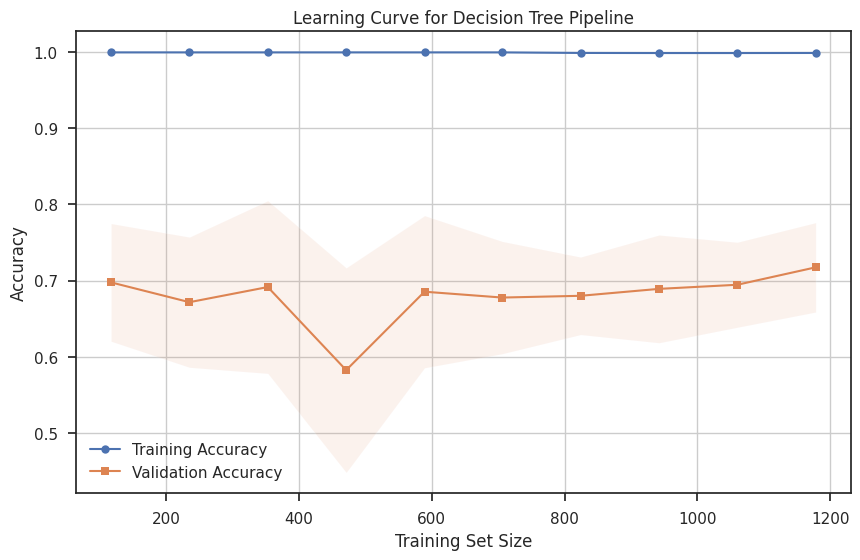

In [ ]:
# LEARNING CUERVE FOR DECISION TREE PIPELINE

# Select the top num_features based on feature importance
important_indices = np.argsort(feature_importance)[-num_features:]
X_selected = X.iloc[:, important_indices]

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=X_selected,
    y=y,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes from 10% to 100%
    n_jobs=-1  # Use all processors
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curve for Decision Tree Pipeline")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

##**Logistic Regression Classifier**

Feature Importance:
       Feature  Coefficient  Importance
6     sex_male    -2.470125    2.470125
10  pclass_3.0    -1.102028    1.102028
8   embarked_S    -0.505917    0.505917
7   embarked_Q    -0.503617    0.503617
9   pclass_2.0    -0.330081    0.330081
1        sibsp    -0.277850    0.277850
2        parch    -0.041683    0.041683
0          age    -0.027361    0.027361
5        cabin     0.006552    0.006552
4         fare     0.003261    0.003261
3       ticket    -0.000399    0.000399


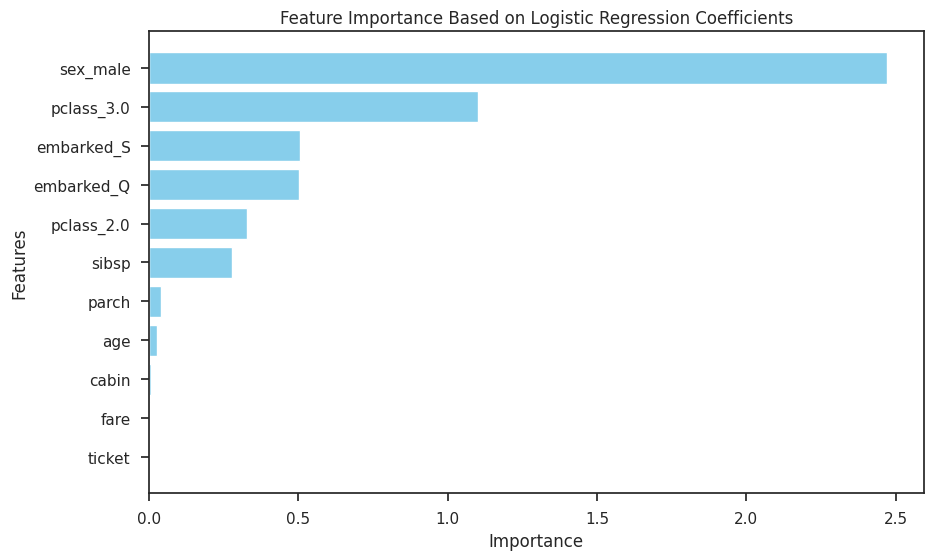

In [ ]:
# Feature importamce using Logictic Regression

# Assuming X is your feature set and y is your target variable
# Fit Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Use solver appropriate for your data
model.fit(X, y)

# Extract feature importance (absolute values of coefficients)
coefficients = model.coef_[0]  # Coefficients for each feature
feature_importance = np.abs(coefficients)  # Absolute values indicate importance

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print or display the importance DataFrame
print("Feature Importance:")
print(importance_df)

# Optionally, visualize the importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# LOGISTIC REGRESSION CLASSIFIER PIPELINE

# Parameters
scaler = StandardScaler()  # Replace with RobustScaler() if needed
smote = SMOTE()
model = LogisticRegression(max_iter=1000)
num_features = df.shape[1] # Specify the number of features wanted

# Stratified K-Fold for 10 folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Pipeline with scaling, SMOTE, feature selection (RFE), and Logistic Regression
pipeline = ImbPipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('feature_selection', RFE(estimator=model, n_features_to_select=num_features)),  # Adjust n_features_to_select as needed
    ('classifier', model)
])

# Initialize variables to compute metrics
accuracies = []
confusion_matrices = []

# Start the timer
start_time = time.time()

# Cross-validation loop
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Compute metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Compute average metrics
avg_accuracy = np.mean(accuracies)
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Print results
print(f"Average Accuracy: {avg_accuracy:.4f}")
print("Average Confusion Matrix:")
print(avg_confusion_matrix)


Elapsed time: 0.75 seconds
Average Accuracy: 0.7800
Average Confusion Matrix:
[[64.1 16.8]
 [12.  38. ]]


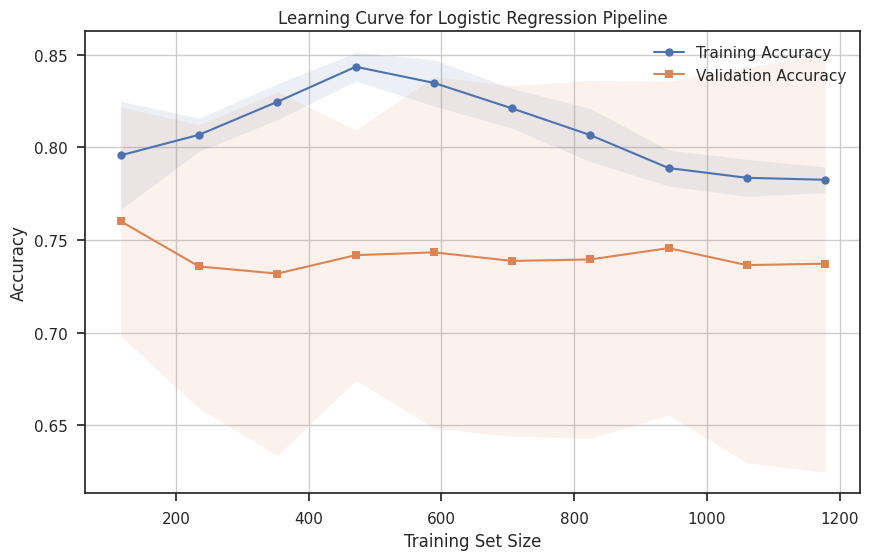

In [ ]:
# LEARNING CURVE FOR LOGISTIC REGRESSION PIPELINE

# Logistic Regression model for RFE
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=num_features)

# Fit RFE to select top num_features features
rfe.fit(X, y)
selected_features = rfe.support_
X_selected = X.loc[:, selected_features]

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=X_selected,
    y=y,
    cv=10,  # 10-fold cross-validation
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes from 10% to 100%
    n_jobs=-1  # Use all processors
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curve for Logistic Regression Pipeline")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

##**PyTorch Lightning Classifier**

This creates a neural network solution.

In [ ]:
# PyTorch Lightning CLASSIFIER

# Parameters
num_features = df.shape[1] # Specify the number of features wanted
num_epochs = 100 # Specify umber of epochs to use in training the NN

# Define 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Choose scaler: 'StandardScaler' or 'RobustScaler'
scaler = StandardScaler()  # Change to RobustScaler() if preferred

# Logistic Regression model for RFE
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=num_features)  # Adjust number of features if needed

# SMOTE for handling imbalance
smote = SMOTE(random_state=42)

# Define PyTorch Lightning model
class NeuralNetLightning(pl.LightningModule):
    def __init__(self, input_size):
        super(NeuralNetLightning, self).__init__()
        self.fc1 = nn.Linear(input_size, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.criterion = nn.BCELoss()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

    def training_step(self, batch, batch_idx):
        X, y = batch
        y_hat = self(X)
        loss = self.criterion(y_hat, y)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

# Lists to store metrics
accuracies = []
confusion_matrices = []

# Start the timer
start_time = time.time()

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Apply RFE
    X_resampled = pd.DataFrame(X_resampled)
    rfe.fit(X_resampled, y_resampled)
    selected_features = rfe.support_
    X_resampled = X_resampled.loc[:, selected_features]
    X_test = X_test.loc[:, selected_features]

    # Scale data
    X_resampled = scaler.fit_transform(X_resampled)
    X_test = scaler.transform(X_test)

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_resampled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_resampled.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    # Create PyTorch Lightning DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Train the model
    model = NeuralNetLightning(input_size=X_resampled.shape[1])
    trainer = pl.Trainer(max_epochs=num_epochs, enable_checkpointing=False, logger=False, enable_progress_bar=False)
    trainer.fit(model, train_loader)

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred = (y_pred >= 0.5).float()
        accuracy = accuracy_score(y_test_tensor, y_pred)
        conf_matrix = confusion_matrix(y_test_tensor, y_pred)

    accuracies.append(accuracy)
    confusion_matrices.append(conf_matrix)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Average metrics
average_accuracy = np.mean(accuracies)
average_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Output results
print(f"Average Accuracy: {average_accuracy:.4f}")
print("Average Confusion Matrix:")
print(average_confusion_matrix)



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | fc1       | Linear  | 120    | train
1 | fc2       | Linear  | 110    | train
2 | fc3       | Linear  | 11     | train
3 | relu      | ReLU    | 0      | train
4 | sigmoid   | Sigmoid | 0      | train
5 | criterion | BCELoss | 0      | train
----------------------------------------------
241       Trainable params
0         Non-trainable params
241       Total params
0.001     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU

Elapsed time: 172.98 seconds
Average Accuracy: 0.7983
Average Confusion Matrix:
[[67.  13.9]
 [12.5 37.5]]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | fc1       | Linear  | 120    | train
1 | fc2       | Linear  | 110    | train
2 | fc3       | Linear  | 11     | train
3 | relu      | ReLU    | 0      | train
4 | sigmoid   | Sigmoid | 0      | train
5 | criterion | BCELoss | 0      | train
----------------------------------------------
241       Trainable params
0         Non-trainable params
241       Total params
0.001     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU

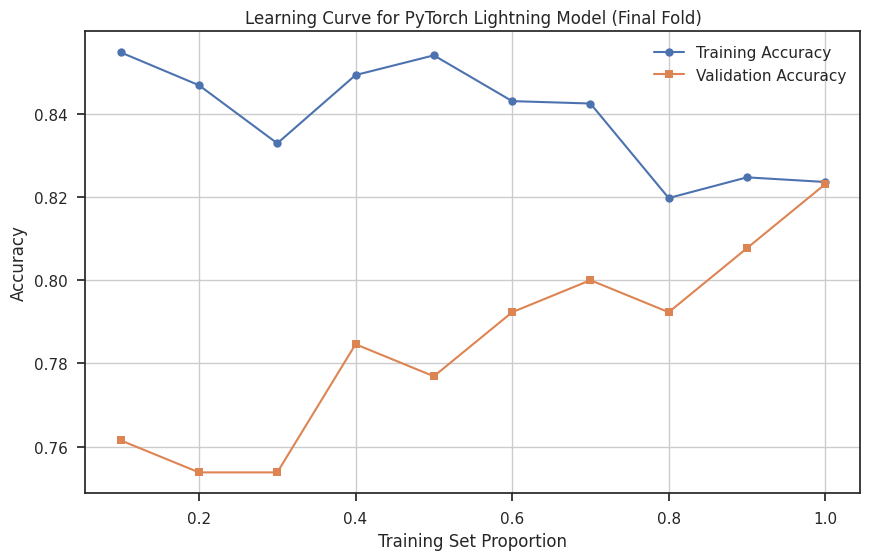

In [ ]:
# LEARNING CURVE FOR FINAL FOLD
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

# Use only the final fold from cross-validation
for train_index, test_index in list(cv.split(X_selected, y))[-1:]:
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for train_size in train_sizes:
        # Downsample training data according to train_size
        train_subset = int(len(X_train) * train_size)
        X_train_subset = X_train[:train_subset]
        y_train_subset = y_train[:train_subset]

        # Scale data
        X_train_scaled = scaler.fit_transform(X_train_subset)
        X_test_scaled = scaler.transform(X_test)

        # Convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_subset.values, dtype=torch.float32).unsqueeze(1)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

        # Create PyTorch Lightning DataLoader
        train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

        # Train the model
        model = NeuralNetLightning(input_size=X_train_scaled.shape[1])
        trainer = pl.Trainer(max_epochs=num_epochs, enable_checkpointing=False, logger=False, enable_progress_bar=False)
        trainer.fit(model, train_loader)

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            y_train_pred = model(X_train_tensor)
            y_train_pred = (y_train_pred >= 0.5).float()
            train_accuracy = accuracy_score(y_train_tensor, y_train_pred)

            y_test_pred = model(X_test_tensor)
            y_test_pred = (y_test_pred >= 0.5).float()
            test_accuracy = accuracy_score(y_test_tensor, y_test_pred)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

# Plot the learning curve
train_mean = np.array(train_scores).reshape(-1, len(train_sizes)).mean(axis=0)
test_mean = np.array(test_scores).reshape(-1, len(train_sizes)).mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')

plt.title("Learning Curve for PyTorch Lightning Model (Final Fold)")
plt.xlabel("Training Set Proportion")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


##**PyCaret Low-Code Classifier**

In [ ]:
# ADJUST normalize, fix_imbalance AND fold TO TURN STANDARDIZATION, BALANCE AND CROSS-VALIDATION ON/OFF
# THE MINIMUM VALUE OF fold is 2 (THERE IS NO WAY TO USE THIS CODE TO EVALUATE PYCARET ON THE HOLDOUT SAMPLE ONLY)
clf_setup = setup(data=df,
                  train_size = 0.8,
                  target='survived',
                  normalize=True,
                  fix_imbalance=True,
                  session_id=42, fold=2)

# Start the timer
start_time = time.time()

# Compare models to choose the best one
best_model = compare_models()

# Create a model; here, we use the best model found by compare_models
# For example, if Logistic Regression was the best: model = create_model('lr')
model = create_model(best_model)

# Tune the model for better performance (optional)
tuned_model = tune_model(model)

# Finalize the model (trains on the whole dataset)
final_model = finalize_model(tuned_model)

# Predict on the test set
predict_model(final_model);

# Display the accuracy and confusion matrix
evaluate_model(final_model)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1309, 12)"
4,Transformed data shape,"(1556, 12)"
5,Transformed train set shape,"(1294, 12)"
6,Transformed test set shape,"(262, 12)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7908,0.8549,0.7275,0.7265,0.7264,0.5572,0.5578,0.2200
lr,Logistic Regression,0.7746,0.8301,0.7600,0.6852,0.7202,0.5324,0.5350,2.4350
knn,K Neighbors Classifier,0.7708,0.8189,0.7475,0.6833,0.7137,0.5233,0.5251,0.1150
rf,Random Forest Classifier,0.7698,0.8366,0.7125,0.6941,0.7029,0.5151,0.5156,0.2800
ridge,Ridge Classifier,0.7689,0.8318,0.7425,0.6824,0.7103,0.5188,0.5210,0.0900
lda,Linear Discriminant Analysis,0.7689,0.8318,0.7425,0.6824,0.7103,0.5188,0.5210,0.1000
ada,Ada Boost Classifier,0.7650,0.8106,0.7375,0.6766,0.7057,0.5108,0.5121,0.1900
et,Extra Trees Classifier,0.7631,0.8216,0.6925,0.6891,0.6906,0.4987,0.4990,0.4350
nb,Naive Bayes,0.7603,0.8040,0.7100,0.6775,0.6923,0.4962,0.4978,0.0600
lightgbm,Light Gradient Boosting Machine,0.7584,0.8315,0.6975,0.6788,0.6880,0.4909,0.4910,2.9500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7901,0.8565,0.7550,0.7123,0.7330,0.5603,0.5609
1,0.7916,0.8533,0.7000,0.7407,0.7198,0.5541,0.5547
Mean,0.7908,0.8549,0.7275,0.7265,0.7264,0.5572,0.5578
Std,0.0008,0.0016,0.0275,0.0142,0.0066,0.0031,0.0031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7824,0.8502,0.7500,0.7009,0.7246,0.5452,0.5460
1,0.7916,0.8496,0.7350,0.7241,0.7295,0.5600,0.5601
Mean,0.7870,0.8499,0.7425,0.7125,0.7271,0.5526,0.5530
Std,0.0046,0.0003,0.0075,0.0116,0.0024,0.0074,0.0070


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8626,0.9191,0.8500,0.8019,0.8252,0.7122,0.7130


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Elapsed time: 41.99 seconds


#**Conclusions**

The performance of the classifier tools for the full set of features is shown in the table below. These results depend upon the random number generators used to create the cross-validation folds (and associated models) and will vary each time you run the code.

The confusion matrices are averaged across 10 folds, except in the case of the PyCaret model. The sum of the entries of the confusion matrix for the PyCaret model differ from those of the other three classifiers. The "compute" column is an approximation of the time required to compute the cross-validated results.

|**Regressor** |       Accuracy      | Confusion Matrix | Compute |
|:----------------------|:--------------:|:--------------:|:--------------:|
|Decision Tree | 0.7471 | $$\begin{bmatrix} 64.7 & 16.2 \\ 15.3 & 34.7\\\end{bmatrix}$$ | 0.35 sec |
|Logistic Regression   | 0.7747 | $$\begin{bmatrix} 64.1 & 16.8 \\ 12.7 & 37.3\\\end{bmatrix}$$ | 0.38 sec |
|PyTorch Lightning | 0.7914 | $$\begin{bmatrix} 66.7 & 14.2 \\ 13.1 & 36.9\\\end{bmatrix}$$ | 275.98 sec |
|PyCaret | 0.819 | $$\begin{bmatrix} 141 & 21 \\ 15 & 85\\\end{bmatrix}$$ | 62.99 sec |


Overall, the PyCaret and PyTorch Lightning models seem best. But the compute for those models is much higher and the logistic regression model may deliver the best bang for your buck.
